# Notebook 2: Visualización de Datos

En este notebook exploraremos distintas herramientas de visualización en Python:
- Gráficos básicos con Matplotlib
- Visualizaciones estadísticas con Seaborn
- Gráficos interactivos (bonus) con Plotly


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Estilo visual
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [3]:
iris = sns.load_dataset("iris")
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


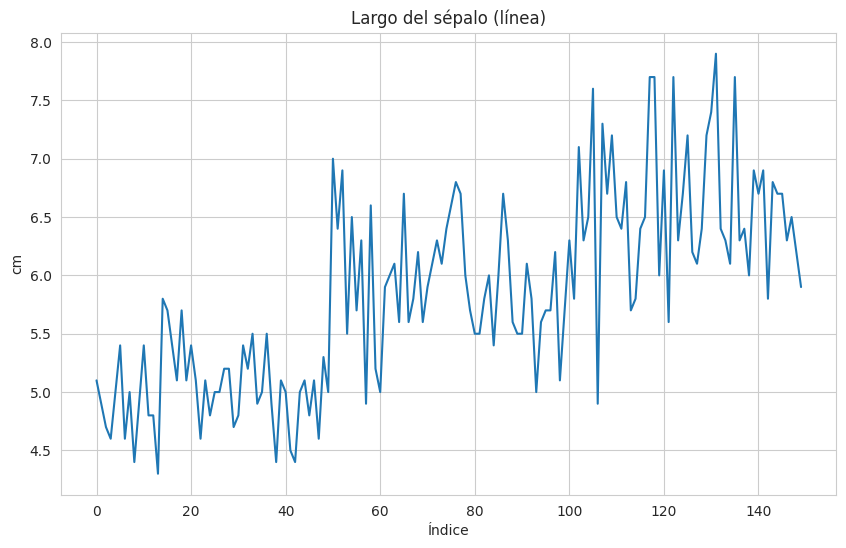

In [4]:
# Gráfico de línea
plt.plot(iris["sepal_length"])
plt.title("Largo del sépalo (línea)")
plt.xlabel("Índice")
plt.ylabel("cm")
plt.show()


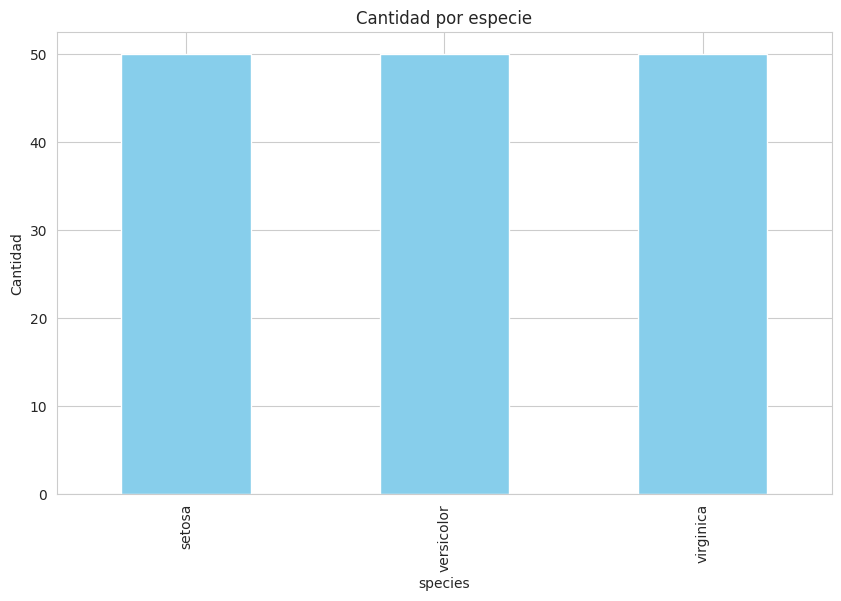

In [5]:
# Gráfico de barras
species_count = iris["species"].value_counts()
species_count.plot(kind="bar", color="skyblue")
plt.title("Cantidad por especie")
plt.ylabel("Cantidad")
plt.show()


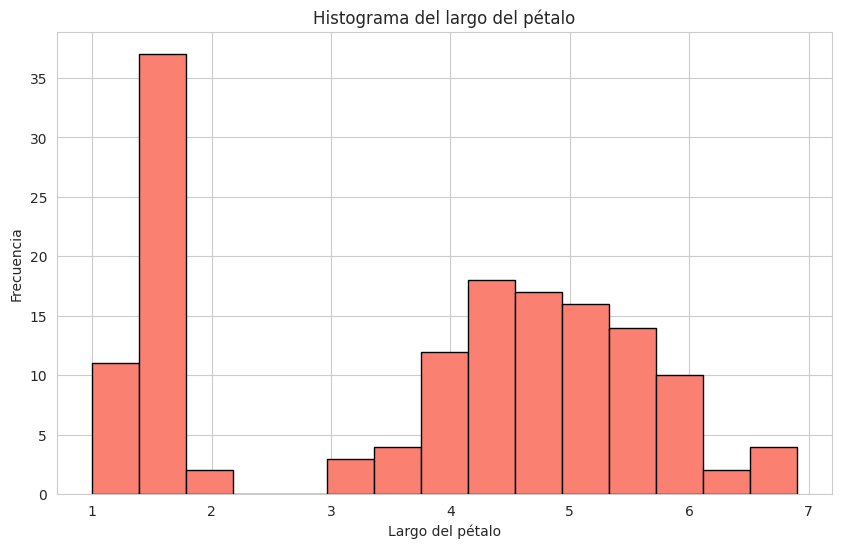

In [6]:
# Histograma
plt.hist(iris["petal_length"], bins=15, color="salmon", edgecolor="black")
plt.title("Histograma del largo del pétalo")
plt.xlabel("Largo del pétalo")
plt.ylabel("Frecuencia")
plt.show()


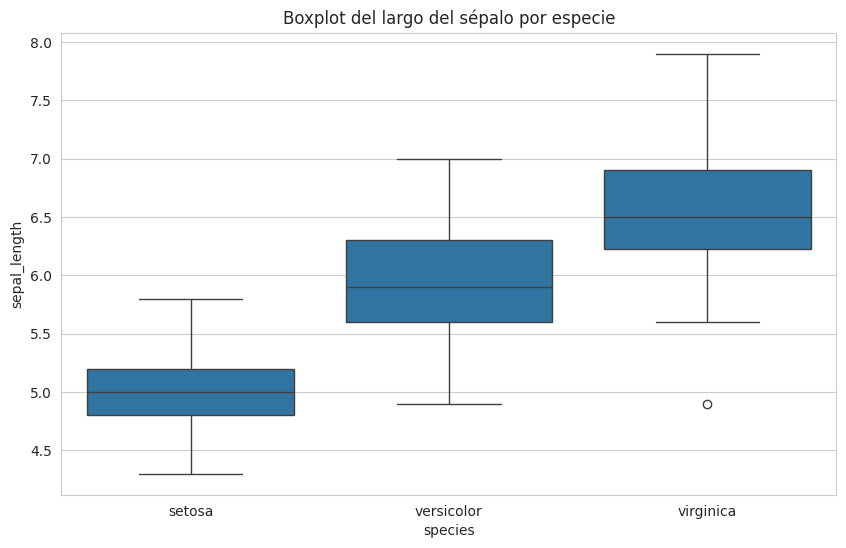

In [7]:
# Boxplot
sns.boxplot(data=iris, x="species", y="sepal_length")
plt.title("Boxplot del largo del sépalo por especie")
plt.show()

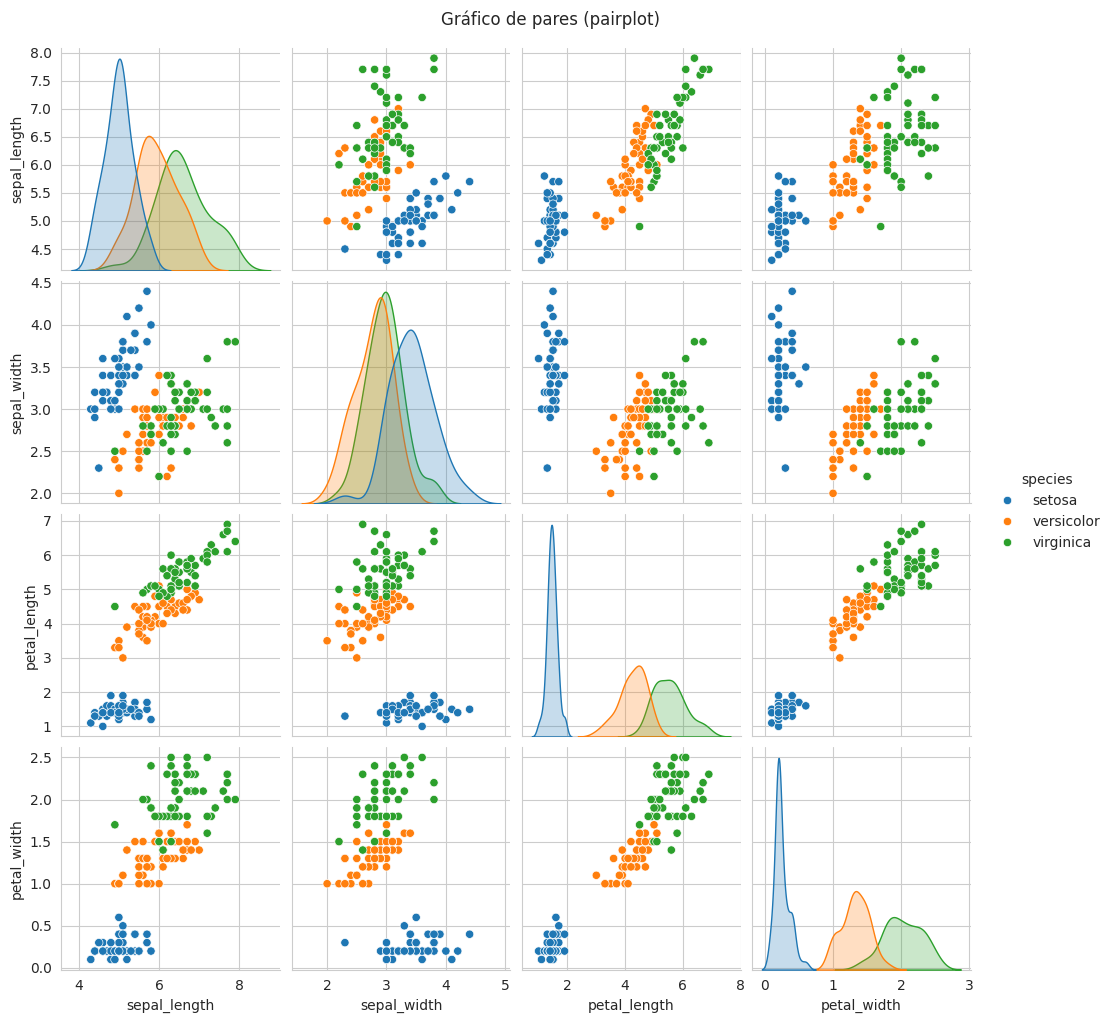

In [8]:
# Pairplot
sns.pairplot(iris, hue="species")
plt.suptitle("Gráfico de pares (pairplot)", y=1.02)
plt.show()


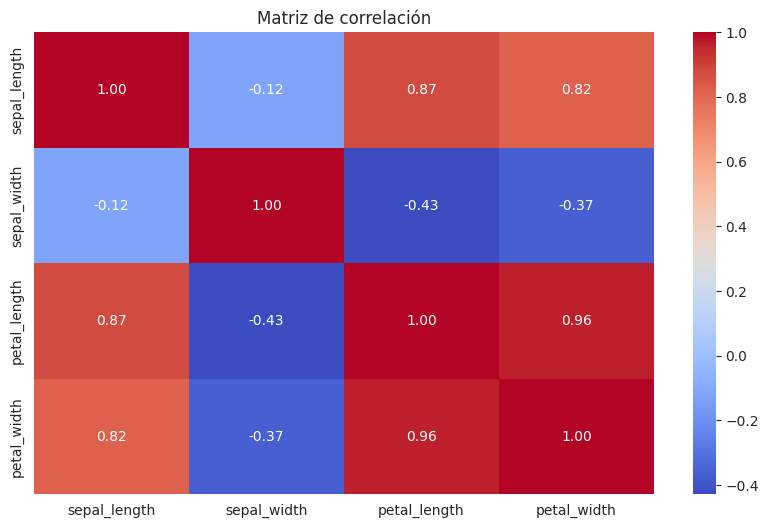

In [10]:
# Heatmap de correlación
# Drop the 'species' column as it is a string type and cannot be used in correlation calculation
corr = iris.drop('species', axis=1).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

In [11]:
fig = px.scatter(
    iris,
    x="sepal_length",
    y="sepal_width",
    color="species",
    size="petal_length",
    title="Plotly Scatter - Iris"
)
fig.show()


# Conclusiones

- Matplotlib ofrece una base sólida para gráficos simples.
- Seaborn facilita la visualización de relaciones estadísticas.
- Plotly permite una experiencia interactiva ideal para dashboards.



In [13]:
from google.colab import auth
auth.authenticate_user()

!git config --global user.email "alejandra.montenegro@uees.edu.ec"
!git config --global user.name "Alejandra Montenegro"

# Función para guardar un notebook en GitHub
def save_to_github(notebook_name, commit_message="Actualizar notebook"):
    import os

    repo_url = "https://github.com/Alejandra-Montenegro/UEES-IA-Semana1-Montenegro-Alejandra.git"
    repo_name = "UEES-IA-Semana1-Montenegro-Alejandra"

    # Clonar el repo si no existe localmente
    if not os.path.exists(repo_name):
        !git clone {repo_url}

    # Mover al repositorio
    %cd {repo_name}

    # Crear carpeta si no existe
    os.makedirs("02_Laboratorio/notebooks", exist_ok=True)

    # Copiar el notebook al repositorio
    !cp /content/{notebook_name} 02_Laboratorio/notebooks/

    # Hacer commit y push
    !git add .
    !git commit -m "{commit_message}"
    !git push origin main

    print(f"✅ {notebook_name} guardado correctamente en GitHub 🚀")
